In [53]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [54]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [55]:
# Read in facturation
fact_train = pd.read_csv('facturation_train.csv')
import datetime
fact_train['PERIODID_MY'] =pd.to_datetime(fact_train['PERIODID_MY'], format='%Y/%m/%d')
print('Training data shape: ', fact_train.shape)
fact_train.head(10)

Training data shape:  (166543, 7)


,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle
0,99690111,2015-05-01,2015-05-03,8497.84,4293.12,16200.0,0
1,99690111,2014-11-01,2014-11-03,866.00,0.00,12000.0,0
2,99690111,2015-06-01,2015-05-31,10790.95,5224.44,16200.0,0
3,99690111,2015-10-01,2015-10-04,12388.46,4786.08,16200.0,0
4,99690111,2015-11-01,2015-11-02,12746.50,4818.48,16200.0,0
5,99690111,2015-08-01,2015-08-02,10610.05,4753.35,16200.0,0
6,99690111,2015-09-01,2015-08-30,11417.12,4616.46,16200.0,0
7,99690111,2014-12-01,2014-12-03,1151.85,0.00,12000.0,0
8,99690111,2015-02-01,2015-01-31,4045.67,1148.45,16200.0,0
9,99690111,2015-12-01,2015-11-30,13119.60,4791.44,16200.0,0


In [56]:
#fact_train['year'] = fact_train['PERIODID_MY'].dt.year
#fact_train['month'] = fact_train['PERIODID_MY'].dt.month
fact_train['PERIODID_MY'] = fact_train['PERIODID_MY'].apply(lambda x: x.strftime('%B-%Y'))
fact_train['Owning'] = fact_train['CurrentTotalBalance']-fact_train['CashBalance']
fact_train['CreditLeft'] = fact_train['CreditLimit'] - fact_train['CurrentTotalBalance']
fact_train['CashRatio'] = fact_train['CashBalance'] / fact_train['CurrentTotalBalance']
#fact_train['Credit-avalible'] = fact_train['CreditLimit']-fact_train['CurrentTotalBalance']
#fact_train=fact_train.drop(columns='PERIODID_MY')
fact_train=fact_train.drop(columns='StatementDate')

In [57]:
fact_train.head(30)

,ID_CPTE,PERIODID_MY,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle,Owning,CreditLeft,CashRatio
0,99690111,May-2015,8497.84,4293.12,16200.0,0,4204.72,7702.16,0.505201
1,99690111,November-2014,866.00,0.00,12000.0,0,866.00,11134.00,0.000000
2,99690111,June-2015,10790.95,5224.44,16200.0,0,5566.51,5409.05,0.484150
3,99690111,October-2015,12388.46,4786.08,16200.0,0,7602.38,3811.54,0.386334
4,99690111,November-2015,12746.50,4818.48,16200.0,0,7928.02,3453.50,0.378024
5,99690111,August-2015,10610.05,4753.35,16200.0,0,5856.70,5589.95,0.448004
6,99690111,September-2015,11417.12,4616.46,16200.0,0,6800.66,4782.88,0.404345
7,99690111,December-2014,1151.85,0.00,12000.0,0,1151.85,10848.15,0.000000
8,99690111,February-2015,4045.67,1148.45,16200.0,0,2897.22,12154.33,0.283871
9,99690111,December-2015,13119.60,4791.44,16200.0,0,8328.16,3080.40,0.365212


In [58]:
#label =fact_train[['CurrentTotalBalance','CreditLimit']]

In [59]:
#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(degree=3, include_bias=False)
#label = poly.fit_transform(label)

In [60]:
#fact_train = fact_train.merge(label,how = 'left')

In [61]:
missing_fact = missing_values_table(fact_train)
missing_fact.head(10)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
CashRatio,9505,5.7


In [62]:
fact_train.dtypes

ID_CPTE                  int64
PERIODID_MY             object
CurrentTotalBalance    float64
CashBalance            float64
CreditLimit            float64
DelqCycle                int64
Owning                 float64
CreditLeft             float64
CashRatio              float64
dtype: object

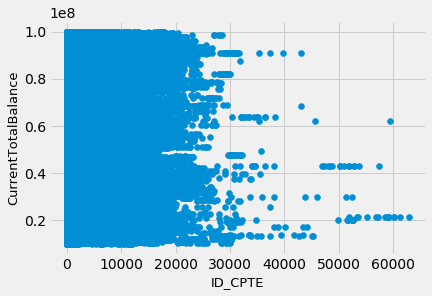

In [63]:
fig, ax = plt.subplots()
ax.scatter(x = fact_train['CurrentTotalBalance'], y = fact_train['ID_CPTE'])
plt.ylabel('CurrentTotalBalance', fontsize=13)
plt.xlabel('ID_CPTE', fontsize=13)
plt.show()



 mu = 2607.54 and sigma = 3973.15



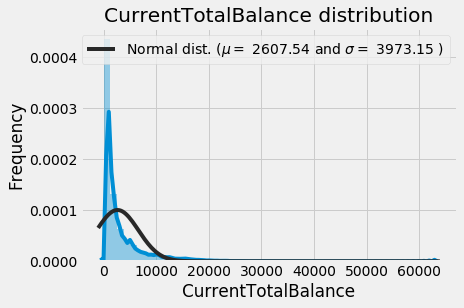

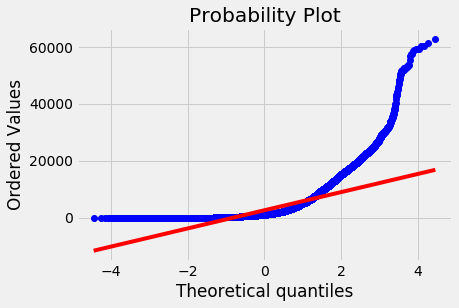

In [64]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics
sns.distplot(fact_train['CurrentTotalBalance'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(fact_train['CurrentTotalBalance'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('CurrentTotalBalance distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(fact_train['CurrentTotalBalance'], plot=plt)
plt.show()

### Skewed features

### Box Cox Transformation of (highly) skewed features

In [65]:
# Groupby the client id (ID_CPTE), count the number of previous DelqCycle, and rename the column
# Group by the client id, calculate aggregation statistics
fact_agg = fact_train.groupby('ID_CPTE', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum', 'skew']).reset_index()
fact_agg.head()

ID_CPTE CurrentTotalBalance                                              \
                          count          mean       max      min        sum   
0  10001822                  14  10701.618571  11932.20  8079.42  149822.66   
1  10007972                  14    332.945714    571.34     0.00    4661.24   
2  10012520                  14    946.823571   1846.95   112.20   13255.53   
3  10025534                  14   5788.015714   6687.50  1274.11   81032.22   
4  10033579                  14    412.296429    629.33    57.78    5772.15   

            CashBalance                         ...    CreditLeft          \
       skew       count        mean      max    ...           max     min   
0 -0.936777          14    7.214286   101.00    ...       3420.58 -432.20   
1 -0.504247          14    0.220714     3.09    ...        700.00  128.66   
2  0.069373          14  382.422143  1224.00    ...       2323.32  353.05   
3 -2.919860          14    0.000000     0.00    ...       4825.89 -587.50   
4 -1.201403          14    4.674286    42.84    ...        442.22 -129.33   

                      CashRatio                                               
        sum      skew     count      mean       max  min       sum      skew  
0  11177.34  0.936777        14  0.000618  0.008646  0.0  0.008646  3.741657  
1   5138.76  0.504247        12  0.000644  0.007724  0.0  0.007724  3.464102  
2  19044.47 -0.194545        14  0.469753  0.978824  0.0  6.576543 -0.286087  
3   4367.78  2.919860        14  0.000000  0.000000  0.0  0.000000  0.000000  
4   1227.85  1.201403        14  0.015512  0.170372  0.0  0.217172  3.418649  

[5 rows x 43 columns]

In [66]:
# List of column names
columns = ['ID_CPTE']

# Iterate through the variables names
for var in fact_agg.columns.levels[0]:
    # Skip the id name
    if var != 'ID_CPTE':
        
        # Iterate through the stat names
        for stat in fact_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('fact_%s_%s' % (var, stat))

In [67]:
# Assign the list of columns names as the dataframe column names
fact_agg.columns = columns
fact_agg.head()

,ID_CPTE,fact_CurrentTotalBalance_count,fact_CurrentTotalBalance_mean,fact_CurrentTotalBalance_max,fact_CurrentTotalBalance_min,fact_CurrentTotalBalance_sum,fact_CurrentTotalBalance_skew,fact_CashBalance_count,fact_CashBalance_mean,fact_CashBalance_max,...,fact_CreditLeft_max,fact_CreditLeft_min,fact_CreditLeft_sum,fact_CreditLeft_skew,fact_CashRatio_count,fact_CashRatio_mean,fact_CashRatio_max,fact_CashRatio_min,fact_CashRatio_sum,fact_CashRatio_skew
0,10001822,14,10701.618571,11932.20,8079.42,149822.66,-0.936777,14,7.214286,101.00,...,3420.58,-432.20,11177.34,0.936777,14,0.000618,0.008646,0.0,0.008646,3.741657
1,10007972,14,332.945714,571.34,0.00,4661.24,-0.504247,14,0.220714,3.09,...,700.00,128.66,5138.76,0.504247,12,0.000644,0.007724,0.0,0.007724,3.464102
2,10012520,14,946.823571,1846.95,112.20,13255.53,0.069373,14,382.422143,1224.00,...,2323.32,353.05,19044.47,-0.194545,14,0.469753,0.978824,0.0,6.576543,-0.286087
3,10025534,14,5788.015714,6687.50,1274.11,81032.22,-2.919860,14,0.000000,0.00,...,4825.89,-587.50,4367.78,2.919860,14,0.000000,0.000000,0.0,0.000000,0.000000
4,10033579,14,412.296429,629.33,57.78,5772.15,-1.201403,14,4.674286,42.84,...,442.22,-129.33,1227.85,1.201403,14,0.015512,0.170372,0.0,0.217172,3.418649


In [68]:
perf_train = pd.read_csv('performance_train.csv')
#perf_train = perf_train.drop(columns='PERIODID_MY')
perf_train.rename(columns={'PERIODID_MY':'AssessmentPeriod'}, inplace=True)
perf_train['AssessmentPeriod'] =pd.to_datetime(perf_train['AssessmentPeriod'], format='%Y/%m/%d')
perf_train['AssessmentPeriod'] = perf_train['AssessmentPeriod'].apply(lambda x: x.strftime('%B-%Y'))

In [69]:
perf_train.head()

,ID_CPTE,AssessmentPeriod,Default
0,99690111,December-2015,0
1,57427180,December-2012,0
2,29617912,December-2015,0
3,61632809,December-2015,0
4,14117855,December-2013,0


In [70]:
#from sklearn import preprocessing
#label_encoder = preprocessing.LabelEncoder()

In [71]:
#class DataPreprocess:
    #def __init__(self, label_encoder):
       # self.lbl = label_encoder

In [72]:
#preprocess = DataPreprocess(label_encoder)

In [73]:
perf_train = perf_train.merge(fact_agg, on = 'ID_CPTE', how = 'left')
perf_train.head()

,ID_CPTE,AssessmentPeriod,Default,fact_CurrentTotalBalance_count,fact_CurrentTotalBalance_mean,fact_CurrentTotalBalance_max,fact_CurrentTotalBalance_min,fact_CurrentTotalBalance_sum,fact_CurrentTotalBalance_skew,fact_CashBalance_count,...,fact_CreditLeft_max,fact_CreditLeft_min,fact_CreditLeft_sum,fact_CreditLeft_skew,fact_CashRatio_count,fact_CashRatio_mean,fact_CashRatio_max,fact_CashRatio_min,fact_CashRatio_sum,fact_CashRatio_skew
0,99690111,December-2015,0,14,7952.558571,13119.60,866.00,111335.82,-0.507221,14,...,12154.33,3080.40,102864.18,0.108435,14,0.343166,0.505201,0.0,4.804323,-1.283795
1,57427180,December-2012,0,14,423.743571,1058.84,210.08,5932.41,1.478484,14,...,2589.92,1741.16,33267.59,-1.478484,14,0.074333,1.010703,0.0,1.040663,3.736388
2,29617912,December-2015,0,14,454.010714,1292.34,135.00,6356.15,1.896143,14,...,5665.00,4507.66,74843.85,-1.896143,14,0.000000,0.000000,0.0,0.000000,0.000000
3,61632809,December-2015,0,14,773.188571,1616.77,240.45,10824.64,0.675326,14,...,1359.55,-16.77,11575.36,-0.675326,14,0.000000,0.000000,0.0,0.000000,0.000000
4,14117855,December-2013,0,14,1261.388571,1822.08,833.27,17659.44,0.232986,14,...,2966.73,1977.92,35540.56,-0.232986,14,0.000000,0.000000,0.0,0.000000,0.000000


### Correlations of Aggregated Values with Target

In [74]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = perf_train['Default'].corr(perf_train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [75]:
# Sort the correlations by the absolute value
# Make sure to reverse to put the largest values at the front of list
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('fact_DelqCycle_max', 0.4261781217517787),
 ('fact_DelqCycle_mean', 0.4169684821589203),
 ('fact_DelqCycle_sum', 0.4167710547523596),
 ('fact_CreditLeft_skew', 0.3019459230290798),
 ('fact_CreditLeft_min', -0.28905665259073404),
 ('fact_CurrentTotalBalance_skew', -0.2881443636115058),
 ('fact_Owning_skew', -0.2761020765387521),
 ('fact_CreditLeft_mean', -0.27491789546029793),
 ('fact_CreditLeft_sum', -0.27491464064809296),
 ('fact_CreditLeft_max', -0.22343540765675193),
 ('fact_DelqCycle_skew', 0.22121348668499863),
 ('fact_CashBalance_max', 0.19860496315290554),
 ('fact_CurrentTotalBalance_mean', 0.18790166493506366),
 ('fact_CurrentTotalBalance_sum', 0.18781853861558198),
 ('fact_CashBalance_mean', 0.1763601060938101)]

### Function for Numeric Aggregations

In [76]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'ID_CPTE' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [77]:
fact_agg_new = agg_numeric(group_var = 'ID_CPTE', df_name = 'fact_train')
fact_agg_new.head()

TypeError: agg_numeric() missing 1 required positional argument: 'df'

In [78]:
#categorical = pd.get_dummies(fact_train.select_dtypes('object'))
#categorical['ID_CPTE'] = fact_train['ID_CPTE']
#categorical.head(20)

In [79]:
categorical_grouped = categorical.groupby('ID_CPTE').agg(['sum', 'mean'])
categorical_grouped.head()

NameError: name 'categorical' is not defined

In [80]:
categorical_grouped.columns.levels[0][:10]

NameError: name 'categorical_grouped' is not defined

In [81]:
categorical_grouped.columns.levels[1]

NameError: name 'categorical_grouped' is not defined

In [82]:
group_var = 'ID_CPTE'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

NameError: name 'categorical_grouped' is not defined

In [83]:
#perf_train = perf_train.merge(categorical_grouped, left_on = 'ID_CPTE', right_index = True, how = 'left')
perf_train.head()

,ID_CPTE,AssessmentPeriod,Default,fact_CurrentTotalBalance_count,fact_CurrentTotalBalance_mean,fact_CurrentTotalBalance_max,fact_CurrentTotalBalance_min,fact_CurrentTotalBalance_sum,fact_CurrentTotalBalance_skew,fact_CashBalance_count,...,fact_CreditLeft_max,fact_CreditLeft_min,fact_CreditLeft_sum,fact_CreditLeft_skew,fact_CashRatio_count,fact_CashRatio_mean,fact_CashRatio_max,fact_CashRatio_min,fact_CashRatio_sum,fact_CashRatio_skew
0,99690111,December-2015,0,14,7952.558571,13119.60,866.00,111335.82,-0.507221,14,...,12154.33,3080.40,102864.18,0.108435,14,0.343166,0.505201,0.0,4.804323,-1.283795
1,57427180,December-2012,0,14,423.743571,1058.84,210.08,5932.41,1.478484,14,...,2589.92,1741.16,33267.59,-1.478484,14,0.074333,1.010703,0.0,1.040663,3.736388
2,29617912,December-2015,0,14,454.010714,1292.34,135.00,6356.15,1.896143,14,...,5665.00,4507.66,74843.85,-1.896143,14,0.000000,0.000000,0.0,0.000000,0.000000
3,61632809,December-2015,0,14,773.188571,1616.77,240.45,10824.64,0.675326,14,...,1359.55,-16.77,11575.36,-0.675326,14,0.000000,0.000000,0.0,0.000000,0.000000
4,14117855,December-2013,0,14,1261.388571,1822.08,833.27,17659.44,0.232986,14,...,2966.73,1977.92,35540.56,-0.232986,14,0.000000,0.000000,0.0,0.000000,0.000000


In [84]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

### Applying Operations to another dataframe

In [85]:
pay_train = pd.read_csv('paiements_train.csv')
pay_train.rename(columns={'TRANSACTION_AMT':'AmountPaid'}, inplace=True)
#pay_train['TRANSACTION_DTTM'] =pd.to_datetime(pay_train['TRANSACTION_DTTM'], format='%Y/%m/%d')
#pay_train['TRANSACTION_DTTM'] = pay_train['TRANSACTION_DTTM'].apply(lambda x: x.strftime('%B-%Y'))
pay_train.drop(['TRANSACTION_DTTM'], axis = 1, inplace = True)
pay_train.head(20)

,ID_CPTE,AmountPaid,PAYMENT_REVERSAL_XFLG
0,99690111,208.00,Q
1,99690111,176.80,Q
2,99690111,200.00,Q
3,99690111,80.80,Q
4,99690111,250.00,Q
5,99690111,273.00,Q
6,99690111,267.50,Q
7,99690111,618.00,Q
8,99690111,226.60,Q
9,99690111,244.80,Q


In [86]:
 #Calculate value count statistics for each `SK_ID_CURR` 
pay_train_agg =pay_train.groupby('ID_CPTE', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum','skew']).reset_index()
pay_train_agg.head()

ID_CPTE AmountPaid                                                 
                 count         mean     max     min       sum      skew
0  10001822         14   543.253571  4200.0   40.80   7605.55  3.709122
1  10007972         50   247.222600  1575.0    2.06  12361.13  2.772371
2  10012520         15   477.727333  1070.0   50.50   7165.91  0.588509
3  10025534          6  1579.550000  6264.0  131.30   9477.30  2.023811
4  10033579         44    82.637955   157.5    5.10   3636.07 -0.644316

In [87]:
categorical_pay = pd.get_dummies(pay_train.select_dtypes('object'))
categorical_pay['ID_CPTE'] = pay_train['ID_CPTE']
categorical_pay.head()

,PAYMENT_REVERSAL_XFLG_N,PAYMENT_REVERSAL_XFLG_Q,ID_CPTE
0,0,1,99690111
1,0,1,99690111
2,0,1,99690111
3,0,1,99690111
4,0,1,99690111


In [88]:
perf_train = perf_train.merge(pay_train_agg, on = 'ID_CPTE', how = 'left')
perf_train.head()

,ID_CPTE,AssessmentPeriod,Default,fact_CurrentTotalBalance_count,fact_CurrentTotalBalance_mean,fact_CurrentTotalBalance_max,fact_CurrentTotalBalance_min,fact_CurrentTotalBalance_sum,fact_CurrentTotalBalance_skew,fact_CashBalance_count,...,fact_CashRatio_max,fact_CashRatio_min,fact_CashRatio_sum,fact_CashRatio_skew,"(AmountPaid, count)","(AmountPaid, mean)","(AmountPaid, max)","(AmountPaid, min)","(AmountPaid, sum)","(AmountPaid, skew)"
0,99690111,December-2015,0,14,7952.558571,13119.60,866.00,111335.82,-0.507221,14,...,0.505201,0.0,4.804323,-1.283795,13,262.615385,618.00,80.80,3414.00,2.053089
1,57427180,December-2012,0,14,423.743571,1058.84,210.08,5932.41,1.478484,14,...,1.010703,0.0,1.040663,3.736388,9,493.848889,1076.25,234.60,4444.64,1.338835
2,29617912,December-2015,0,14,454.010714,1292.34,135.00,6356.15,1.896143,14,...,0.000000,0.0,0.000000,0.000000,20,339.350500,649.78,100.00,6787.01,0.217394
3,61632809,December-2015,0,14,773.188571,1616.77,240.45,10824.64,0.675326,14,...,0.000000,0.0,0.000000,0.000000,32,350.276562,1137.76,8.56,11208.85,1.428904
4,14117855,December-2013,0,14,1261.388571,1822.08,833.27,17659.44,0.232986,14,...,0.000000,0.0,0.000000,0.000000,11,1302.228182,1752.00,852.24,14324.51,0.058616


In [89]:
tran_train = pd.read_csv('transactions_train.csv')

In [90]:
tran_train.shape

(690730, 11)

In [91]:
tran_train_add = pd.read_csv('additional_transactions_train.csv')

In [92]:
tran_train=tran_train.append(tran_train_add)

In [93]:
tran_train.shape

(757767, 11)

In [94]:
tran_train.drop(['MERCHANT_CITY_NAME'], axis = 1, inplace = True)

In [95]:
#Calculate value count statistics for each `SK_ID_CURR` 
tran_train_agg =tran_train.groupby('ID_CPTE', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum', 'skew']).reset_index()
tran_train_agg.head()

ID_CPTE PRIOR_CREDIT_LIMIT_AMT                                         \
                             count         mean     max     min       sum   
0  10034823                    345  1008.568116  1800.0  -357.0  347956.0   
1  10069450                    113  1426.061947  2125.0  1081.0  161145.0   
2  10081565                    158   393.253165  1510.0  -177.0   62134.0   
3  10083607                    126   362.507937  1100.0   100.0   45676.0   
4  10097162                    329  1266.562310  3300.0   -89.0  416699.0   

            TRANSACTION_AMT                                               
       skew           count       mean      max  min       sum      skew  
0 -0.479778             345  32.623855   860.28  0.0  11255.23  8.558012  
1  0.277200             113  55.146195   535.50  0.0   6231.52  2.910919  
2  1.628099             158  30.297215   288.86  0.0   4786.96  2.855481  
3  1.346991             126  53.810000   695.50  0.0   6780.06  4.618627  
4  0.841393             329  46.246930  1191.71  0.0  15215.24  9.925712

In [96]:
perf_train = perf_train.merge(tran_train_agg, on = 'ID_CPTE', how = 'left')
perf_train.head()

,ID_CPTE,AssessmentPeriod,Default,fact_CurrentTotalBalance_count,fact_CurrentTotalBalance_mean,fact_CurrentTotalBalance_max,fact_CurrentTotalBalance_min,fact_CurrentTotalBalance_sum,fact_CurrentTotalBalance_skew,fact_CashBalance_count,...,"(PRIOR_CREDIT_LIMIT_AMT, max)","(PRIOR_CREDIT_LIMIT_AMT, min)","(PRIOR_CREDIT_LIMIT_AMT, sum)","(PRIOR_CREDIT_LIMIT_AMT, skew)","(TRANSACTION_AMT, count)","(TRANSACTION_AMT, mean)","(TRANSACTION_AMT, max)","(TRANSACTION_AMT, min)","(TRANSACTION_AMT, sum)","(TRANSACTION_AMT, skew)"
0,99690111,December-2015,0,14,7952.558571,13119.60,866.00,111335.82,-0.507221,14,...,13560.0,3260.0,1889054.0,0.475431,251.0,55.094143,1040.00,0.00,13828.63,5.415886
1,57427180,December-2012,0,14,423.743571,1058.84,210.08,5932.41,1.478484,14,...,2808.0,200.0,324422.0,-3.252396,141.0,37.099220,318.00,0.00,5230.99,2.961331
2,29617912,December-2015,0,14,454.010714,1292.34,135.00,6356.15,1.896143,14,...,5800.0,4670.0,343142.0,-0.228656,64.0,104.133125,533.93,6.18,6664.52,1.910943
3,61632809,December-2015,0,14,773.188571,1616.77,240.45,10824.64,0.675326,14,...,1600.0,100.0,317389.0,-0.338392,317.0,26.673975,247.80,3.03,8455.65,3.478949
4,14117855,December-2013,0,14,1261.388571,1822.08,833.27,17659.44,0.232986,14,...,3625.0,1371.0,423360.0,0.004061,167.0,94.901018,229.95,14.14,15848.47,0.438630


In [97]:
#perf_train.fillna(perf_train.mode(), inplace=True)

In [98]:
numeric_feats = perf_train.dtypes[perf_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = perf_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
fact_DelqCycle_min,77.116796
fact_CashBalance_min,28.042257
"(TRANSACTION_AMT, max)",19.734229
fact_CashRatio_min,17.205071
"(PRIOR_CREDIT_LIMIT_AMT, sum)",12.123243
"(AmountPaid, sum)",12.030735
"(TRANSACTION_AMT, min)",11.623821
"(AmountPaid, min)",9.668270
fact_CashBalance_sum,9.450046
fact_CashBalance_mean,9.447317


In [99]:
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
    #perf_train[feat] += 1
    #perf_train[feat] = boxcox1p(perf_train[feat], lam)
    
#perf_train[skewed_features] = np.log1p(perf_train[skewed_features])

### Missing Values

In [100]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [101]:
missing_train = missing_values_table(perf_train)
missing_train.head(10)

Your selected dataframe has 63 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
"(PRIOR_CREDIT_LIMIT_AMT, max)",7776,65.3
"(PRIOR_CREDIT_LIMIT_AMT, min)",7776,65.3
"(TRANSACTION_AMT, sum)",7776,65.3
"(TRANSACTION_AMT, min)",7776,65.3
"(TRANSACTION_AMT, max)",7776,65.3
"(TRANSACTION_AMT, mean)",7776,65.3
"(TRANSACTION_AMT, count)",7776,65.3
"(PRIOR_CREDIT_LIMIT_AMT, skew)",7776,65.3
"(PRIOR_CREDIT_LIMIT_AMT, sum)",7776,65.3
"(TRANSACTION_AMT, skew)",7776,65.3


In [102]:
#perf_train.fillna(perf_train.mode(), inplace=True)

In [103]:
#perf_train.dropna(inplace=True)

In [104]:
missing_train = missing_values_table(perf_train)
missing_train.head(10)

Your selected dataframe has 63 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
"(PRIOR_CREDIT_LIMIT_AMT, max)",7776,65.3
"(PRIOR_CREDIT_LIMIT_AMT, min)",7776,65.3
"(TRANSACTION_AMT, sum)",7776,65.3
"(TRANSACTION_AMT, min)",7776,65.3
"(TRANSACTION_AMT, max)",7776,65.3
"(TRANSACTION_AMT, mean)",7776,65.3
"(TRANSACTION_AMT, count)",7776,65.3
"(PRIOR_CREDIT_LIMIT_AMT, skew)",7776,65.3
"(PRIOR_CREDIT_LIMIT_AMT, sum)",7776,65.3
"(TRANSACTION_AMT, skew)",7776,65.3


In [105]:
#perf_train['(TRANSACTION_AMT, max)'] = perf_train['(TRANSACTION_AMT, max)'].fillna(perf_train['(TRANSACTION_AMT, max)'].mode()[0])

In [106]:
perf_train.head()

,ID_CPTE,AssessmentPeriod,Default,fact_CurrentTotalBalance_count,fact_CurrentTotalBalance_mean,fact_CurrentTotalBalance_max,fact_CurrentTotalBalance_min,fact_CurrentTotalBalance_sum,fact_CurrentTotalBalance_skew,fact_CashBalance_count,...,"(PRIOR_CREDIT_LIMIT_AMT, max)","(PRIOR_CREDIT_LIMIT_AMT, min)","(PRIOR_CREDIT_LIMIT_AMT, sum)","(PRIOR_CREDIT_LIMIT_AMT, skew)","(TRANSACTION_AMT, count)","(TRANSACTION_AMT, mean)","(TRANSACTION_AMT, max)","(TRANSACTION_AMT, min)","(TRANSACTION_AMT, sum)","(TRANSACTION_AMT, skew)"
0,99690111,December-2015,0,14,7952.558571,13119.60,866.00,111335.82,-0.507221,14,...,13560.0,3260.0,1889054.0,0.475431,251.0,55.094143,1040.00,0.00,13828.63,5.415886
1,57427180,December-2012,0,14,423.743571,1058.84,210.08,5932.41,1.478484,14,...,2808.0,200.0,324422.0,-3.252396,141.0,37.099220,318.00,0.00,5230.99,2.961331
2,29617912,December-2015,0,14,454.010714,1292.34,135.00,6356.15,1.896143,14,...,5800.0,4670.0,343142.0,-0.228656,64.0,104.133125,533.93,6.18,6664.52,1.910943
3,61632809,December-2015,0,14,773.188571,1616.77,240.45,10824.64,0.675326,14,...,1600.0,100.0,317389.0,-0.338392,317.0,26.673975,247.80,3.03,8455.65,3.478949
4,14117855,December-2013,0,14,1261.388571,1822.08,833.27,17659.44,0.232986,14,...,3625.0,1371.0,423360.0,0.004061,167.0,94.901018,229.95,14.14,15848.47,0.438630


In [107]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

### Calculate Information for Testing Data

In [108]:
perf_test = pd.read_csv('performance_test.csv')
# one-hot encoding of categorical variables
#perf_train = pd.get_dummies(perf_train)
#perf_test = pd.get_dummies(perf_test)
missing_values_test = missing_values_table(perf_test)
missing_values_test.head(20)

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Default,5100,100.0


In [109]:
perf_test.rename(columns={'PERIODID_MY':'AssessmentPeriod'}, inplace=True)
perf_test['AssessmentPeriod'] =pd.to_datetime(perf_test['AssessmentPeriod'], format='%Y/%m/%d')
perf_test['AssessmentPeriod'] = perf_test['AssessmentPeriod'].apply(lambda x: x.strftime('%B-%Y'))

In [110]:
perf_test.head(10)

,ID_CPTE,AssessmentPeriod,Default
0,71424379,December-2014,NaN
1,64887111,December-2015,NaN
2,69431075,December-2014,NaN
3,31823308,December-2016,NaN
4,39407834,December-2012,NaN
5,94576690,December-2015,NaN
6,35602796,December-2014,NaN
7,94837853,December-2014,NaN
8,84623445,December-2014,NaN
9,62980143,December-2016,NaN


In [111]:
perf_test = perf_test.drop(columns='Default')

In [112]:
perf_test.head(10)

,ID_CPTE,AssessmentPeriod
0,71424379,December-2014
1,64887111,December-2015
2,69431075,December-2014
3,31823308,December-2016
4,39407834,December-2012
5,94576690,December-2015
6,35602796,December-2014
7,94837853,December-2014
8,84623445,December-2014
9,62980143,December-2016


In [113]:
perf_test['ID_CPTE'].unique()

array([71424379, 64887111, 69431075, ..., 11958724, 24058348, 86972474],
      dtype=int64)

In [114]:
len(set(perf_test['ID_CPTE']))

5100

In [115]:
fact_test = pd.read_csv('facturation_test.csv')
import datetime
fact_test['PERIODID_MY'] =pd.to_datetime(fact_test['PERIODID_MY'], format='%Y/%m/%d')
print('Training data shape: ', fact_test.shape)
fact_test.head(10)

Training data shape:  (71385, 7)


,ID_CPTE,PERIODID_MY,StatementDate,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle
0,71424379,2013-11-01,2013-11-04,1444.30,0.0,3200.0,0
1,71424379,2014-05-01,2014-04-30,785.89,0.0,3200.0,0
2,71424379,2014-08-01,2014-08-02,1095.48,0.0,3200.0,0
3,71424379,2014-04-01,2014-04-02,845.30,0.0,3200.0,0
4,71424379,2013-12-01,2013-11-30,1623.28,0.0,3200.0,0
5,71424379,2014-03-01,2014-03-02,707.70,0.0,3200.0,0
6,71424379,2014-07-01,2014-07-05,2244.00,0.0,3200.0,0
7,71424379,2014-10-01,2014-10-01,1079.69,0.0,3200.0,0
8,71424379,2014-06-01,2014-05-31,706.00,0.0,3200.0,0
9,71424379,2014-11-01,2014-10-31,925.16,0.0,3200.0,0


In [116]:
#fact_train['year'] = fact_train['PERIODID_MY'].dt.year
#fact_train['month'] = fact_train['PERIODID_MY'].dt.month
fact_test['PERIODID_MY'] = fact_test['PERIODID_MY'].apply(lambda x: x.strftime('%B-%Y'))
fact_test['Owning'] = fact_test['CurrentTotalBalance']-fact_test['CashBalance']
fact_test['CreditLeft'] = fact_test['CreditLimit'] - fact_test['CurrentTotalBalance']
fact_test['CashRatio'] = fact_test['CashBalance'] / fact_test['CurrentTotalBalance']
#fact_train['Credit-avalible'] = fact_train['CreditLimit']-fact_train['CurrentTotalBalance']
#fact_train=fact_train.drop(columns='PERIODID_MY')
fact_test=fact_test.drop(columns='StatementDate')

In [117]:
fact_test.head()

,ID_CPTE,PERIODID_MY,CurrentTotalBalance,CashBalance,CreditLimit,DelqCycle,Owning,CreditLeft,CashRatio
0,71424379,November-2013,1444.30,0.0,3200.0,0,1444.30,1755.70,0.0
1,71424379,May-2014,785.89,0.0,3200.0,0,785.89,2414.11,0.0
2,71424379,August-2014,1095.48,0.0,3200.0,0,1095.48,2104.52,0.0
3,71424379,April-2014,845.30,0.0,3200.0,0,845.30,2354.70,0.0
4,71424379,December-2013,1623.28,0.0,3200.0,0,1623.28,1576.72,0.0


In [118]:
len(set(fact_test['ID_CPTE']))

5100

In [119]:
missing_values_test = missing_values_table(fact_test)
missing_values_test.head(20)

Your selected dataframe has 9 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
CashRatio,4003,5.6


In [120]:
# Group by the client id, calculate aggregation statistics
fact_agg_test = fact_test.groupby('ID_CPTE', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum','skew']).reset_index()
fact_agg_test.head()

ID_CPTE CurrentTotalBalance                                               \
                          count          mean       max       min        sum   
0  10074849                  14    255.085714    617.11      0.00    3571.20   
1  10086539                  14    759.141429   1407.60    290.85   10627.98   
2  10140908                  14   3344.138571   3926.90   2657.40   46817.94   
3  10147994                  14   3165.111429   4374.16   1673.74   44311.56   
4  10152808                  14  14195.720714  15177.08  10764.60  198740.09   

            CashBalance                       ...    CreditLeft           \
       skew       count       mean     max    ...           max      min   
0  0.277687          14   0.000000    0.00    ...       1700.00  1082.89   
1  0.684992          14   0.000000    0.00    ...       1309.15   192.40   
2 -0.228655          14  14.332143  143.52    ...        942.60  -326.90   
3 -0.296321          14   7.237143   55.12    ...       2326.26  -374.16   
4 -3.115495          14   0.000000    0.00    ...       4535.40   122.92   

                      CashRatio                                               
        sum      skew     count      mean       max  min       sum      skew  
0  20228.80 -0.277687        13  0.000000  0.000000  0.0  0.000000  0.000000  
1  11272.02 -0.508032        14  0.000000  0.000000  0.0  0.000000  0.000000  
2   3582.06  0.228655        14  0.003771  0.037348  0.0  0.052794  3.147188  
3  11688.44  0.296321        14  0.001902  0.014150  0.0  0.026624  2.361694  
4  15459.91  3.115495        14  0.000000  0.000000  0.0  0.000000  0.000000  

[5 rows x 43 columns]

In [121]:
perf_test = perf_test.merge(fact_agg_test, on = 'ID_CPTE', how = 'left')
perf_test.head()

,ID_CPTE,AssessmentPeriod,"(CurrentTotalBalance, count)","(CurrentTotalBalance, mean)","(CurrentTotalBalance, max)","(CurrentTotalBalance, min)","(CurrentTotalBalance, sum)","(CurrentTotalBalance, skew)","(CashBalance, count)","(CashBalance, mean)",...,"(CreditLeft, max)","(CreditLeft, min)","(CreditLeft, sum)","(CreditLeft, skew)","(CashRatio, count)","(CashRatio, mean)","(CashRatio, max)","(CashRatio, min)","(CashRatio, sum)","(CashRatio, skew)"
0,71424379,December-2014,14,1050.885000,2244.00,595.35,14712.39,1.678972,14,0.0,...,2604.65,956.00,30087.61,-1.678972,14,0.0,0.0,0.0,0.0,0.0
1,64887111,December-2015,14,1001.472857,3988.96,127.50,14020.62,2.529913,14,0.0,...,4972.50,1111.04,57379.38,-2.529913,14,0.0,0.0,0.0,0.0,0.0
2,69431075,December-2014,14,5745.841429,6891.06,4685.10,80441.78,-0.150273,14,0.0,...,4514.90,2308.94,48358.22,0.150273,14,0.0,0.0,0.0,0.0,0.0
3,31823308,December-2016,14,128.638571,445.00,3.06,1800.94,1.448940,14,0.0,...,3096.94,2655.00,41599.06,-1.448940,14,0.0,0.0,0.0,0.0,0.0
4,39407834,December-2012,14,2714.097857,3795.75,1350.33,37997.37,-0.662527,14,0.0,...,2849.67,404.25,20802.63,0.662527,14,0.0,0.0,0.0,0.0,0.0


In [122]:
#cat_fact_test = pd.get_dummies(fact_test.select_dtypes('object'))
#cat_fact_test['ID_CPTE'] = fact_test['ID_CPTE']
#categorical.head(20)

In [123]:
#perf_test = perf_test.merge(cat_fact_test, left_on = 'ID_CPTE', right_index = True, how = 'left')
#len(perf_test) != len(set(perf_test))
#perf_test.head()

In [124]:
 len(perf_test) != len(set(perf_test))

True

In [125]:
perf_test.head()

,ID_CPTE,AssessmentPeriod,"(CurrentTotalBalance, count)","(CurrentTotalBalance, mean)","(CurrentTotalBalance, max)","(CurrentTotalBalance, min)","(CurrentTotalBalance, sum)","(CurrentTotalBalance, skew)","(CashBalance, count)","(CashBalance, mean)",...,"(CreditLeft, max)","(CreditLeft, min)","(CreditLeft, sum)","(CreditLeft, skew)","(CashRatio, count)","(CashRatio, mean)","(CashRatio, max)","(CashRatio, min)","(CashRatio, sum)","(CashRatio, skew)"
0,71424379,December-2014,14,1050.885000,2244.00,595.35,14712.39,1.678972,14,0.0,...,2604.65,956.00,30087.61,-1.678972,14,0.0,0.0,0.0,0.0,0.0
1,64887111,December-2015,14,1001.472857,3988.96,127.50,14020.62,2.529913,14,0.0,...,4972.50,1111.04,57379.38,-2.529913,14,0.0,0.0,0.0,0.0,0.0
2,69431075,December-2014,14,5745.841429,6891.06,4685.10,80441.78,-0.150273,14,0.0,...,4514.90,2308.94,48358.22,0.150273,14,0.0,0.0,0.0,0.0,0.0
3,31823308,December-2016,14,128.638571,445.00,3.06,1800.94,1.448940,14,0.0,...,3096.94,2655.00,41599.06,-1.448940,14,0.0,0.0,0.0,0.0,0.0
4,39407834,December-2012,14,2714.097857,3795.75,1350.33,37997.37,-0.662527,14,0.0,...,2849.67,404.25,20802.63,0.662527,14,0.0,0.0,0.0,0.0,0.0


In [126]:
pay_test = pd.read_csv('paiements_test.csv')
pay_test.rename(columns={'TRANSACTION_AMT':'AmountPaid'}, inplace=True)
#pay_train['TRANSACTION_DTTM'] =pd.to_datetime(pay_train['TRANSACTION_DTTM'], format='%Y/%m/%d')
#pay_train['TRANSACTION_DTTM'] = pay_train['TRANSACTION_DTTM'].apply(lambda x: x.strftime('%B-%Y'))
pay_test.drop(['TRANSACTION_DTTM'], axis = 1, inplace = True)
pay_test.head(20)

,ID_CPTE,AmountPaid,PAYMENT_REVERSAL_XFLG
0,71424379,686.00,Q
1,71424379,680.74,Q
2,71424379,1116.96,Q
3,71424379,808.78,Q
4,71424379,949.20,Q
5,71424379,1010.43,Q
6,71424379,846.37,Q
7,71424379,960.75,Q
8,71424379,1111.76,Q
9,71424379,705.00,Q


In [127]:
 #Calculate value count statistics for each `SK_ID_CURR` 
pay_test_agg =pay_test.groupby('ID_CPTE', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum','skew']).reset_index()
pay_test_agg.head()

ID_CPTE AmountPaid                                                 
                 count        mean      max     min       sum      skew
0  10074849         15  430.185333   767.52  138.86   6452.78  0.269012
1  10086539         16  657.477500  1048.60  204.00  10519.64 -0.302373
2  10140908         20  123.918500   239.99    4.16   2478.37 -0.116917
3  10147994         14  193.866429   261.08    4.24   2714.13 -1.514135
4  10152808         30  351.091333   530.00  105.00  10532.74 -0.121896

In [128]:
categorical_pay_test = pd.get_dummies(pay_test.select_dtypes('object'))
categorical_pay_test['ID_CPTE'] = pay_test['ID_CPTE']
categorical_pay_test.head()

,PAYMENT_REVERSAL_XFLG_N,PAYMENT_REVERSAL_XFLG_Q,ID_CPTE
0,0,1,71424379
1,0,1,71424379
2,0,1,71424379
3,0,1,71424379
4,0,1,71424379


In [129]:
perf_test = perf_test.merge(pay_test_agg, on = 'ID_CPTE', how = 'left')
perf_test.head()

,ID_CPTE,AssessmentPeriod,"(CurrentTotalBalance, count)","(CurrentTotalBalance, mean)","(CurrentTotalBalance, max)","(CurrentTotalBalance, min)","(CurrentTotalBalance, sum)","(CurrentTotalBalance, skew)","(CashBalance, count)","(CashBalance, mean)",...,"(CashRatio, max)","(CashRatio, min)","(CashRatio, sum)","(CashRatio, skew)","(AmountPaid, count)","(AmountPaid, mean)","(AmountPaid, max)","(AmountPaid, min)","(AmountPaid, sum)","(AmountPaid, skew)"
0,71424379,December-2014,14,1050.885000,2244.00,595.35,14712.39,1.678972,14,0.0,...,0.0,0.0,0.0,0.0,12,979.559167,2288.00,590.72,11754.71,2.569607
1,64887111,December-2015,14,1001.472857,3988.96,127.50,14020.62,2.529913,14,0.0,...,0.0,0.0,0.0,0.0,12,712.760833,1584.69,128.75,8553.13,0.910477
2,69431075,December-2014,14,5745.841429,6891.06,4685.10,80441.78,-0.150273,14,0.0,...,0.0,0.0,0.0,0.0,39,295.060000,861.78,50.50,11507.34,0.944075
3,31823308,December-2016,14,128.638571,445.00,3.06,1800.94,1.448940,14,0.0,...,0.0,0.0,0.0,0.0,11,150.827273,471.70,3.12,1659.10,1.190991
4,39407834,December-2012,14,2714.097857,3795.75,1350.33,37997.37,-0.662527,14,0.0,...,0.0,0.0,0.0,0.0,25,279.970000,1050.00,150.00,6999.25,2.601144


In [130]:
tran_test = pd.read_csv('transactions_test.csv')


In [131]:
tran_test.shape

(279567, 11)

In [132]:
tran_test_add = pd.read_csv('additional_transactions_test.csv')

In [133]:
tran_test=tran_test.append(tran_test_add)

In [134]:
tran_test.drop(['MERCHANT_CITY_NAME'], axis = 1, inplace = True)

In [135]:
tran_test.shape

(409849, 10)

In [136]:
#Calculate value count statistics for each `SK_ID_CURR` 
tran_test_agg =tran_test.groupby('ID_CPTE', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum','skew']).reset_index()
tran_test_agg.head()

ID_CPTE PRIOR_CREDIT_LIMIT_AMT                                        \
                             count         mean     max    min       sum   
0  10074849                    150  1397.313333  1700.0  972.0  209597.0   
1  10086539                    296   763.885135  1528.0 -186.0  226110.0   
2  10140908                    124   425.225806  1163.0   -9.0   52728.0   
3  10153124                    190   537.289474  1100.0  103.0  102085.0   
4  10211370                    104   162.711538   926.0 -198.0   16922.0   

            TRANSACTION_AMT                                               
       skew           count       mean     max   min       sum      skew  
0 -0.174933             150  44.480867  362.25  3.03   6672.13  3.234357  
1 -0.044963             296  40.998851  245.92  0.00  12135.66  1.721840  
2  0.250534             124  19.852339  239.20  0.00   2461.69  4.625971  
3  0.317090             190  27.243474  320.12  0.00   5176.26  3.713241  
4  1.293109             104  67.158077  490.78  3.00   6984.44  2.274862

In [137]:
perf_test = perf_test.merge(tran_test_agg, on = 'ID_CPTE', how = 'left')
perf_test.head()

,ID_CPTE,AssessmentPeriod,"(CurrentTotalBalance, count)","(CurrentTotalBalance, mean)","(CurrentTotalBalance, max)","(CurrentTotalBalance, min)","(CurrentTotalBalance, sum)","(CurrentTotalBalance, skew)","(CashBalance, count)","(CashBalance, mean)",...,"(PRIOR_CREDIT_LIMIT_AMT, max)","(PRIOR_CREDIT_LIMIT_AMT, min)","(PRIOR_CREDIT_LIMIT_AMT, sum)","(PRIOR_CREDIT_LIMIT_AMT, skew)","(TRANSACTION_AMT, count)","(TRANSACTION_AMT, mean)","(TRANSACTION_AMT, max)","(TRANSACTION_AMT, min)","(TRANSACTION_AMT, sum)","(TRANSACTION_AMT, skew)"
0,71424379,December-2014,14,1050.885000,2244.00,595.35,14712.39,1.678972,14,0.0,...,3043.0,797.0,325895.0,-0.975290,149.0,81.375839,1005.94,21.63,12125.00,8.654062
1,64887111,December-2015,14,1001.472857,3988.96,127.50,14020.62,2.529913,14,0.0,...,5067.0,2826.0,661158.0,-0.877894,156.0,94.857756,771.00,11.00,14797.81,3.231141
2,69431075,December-2014,14,5745.841429,6891.06,4685.10,80441.78,-0.150273,14,0.0,...,5079.0,2332.0,434928.0,-0.217512,113.0,77.328584,779.00,0.00,8738.13,3.365889
3,31823308,December-2016,14,128.638571,445.00,3.06,1800.94,1.448940,14,0.0,...,3097.0,100.0,321819.0,-6.863202,112.0,15.743571,219.44,0.00,1763.28,6.224102
4,39407834,December-2012,14,2714.097857,3795.75,1350.33,37997.37,-0.662527,14,0.0,...,3052.0,721.0,169208.0,1.189985,113.0,80.468761,693.19,0.00,9092.97,2.527404


In [138]:
missing_test = missing_values_test(perf_test)
missing_test.head(10)

TypeError: 'DataFrame' object is not callable

Correlations

In [139]:
# Calculate all correlations in dataframe
corrs_train = perf_train.corr()


In [140]:
corrs = corrs_train.sort_values('Default', ascending = False)

# Ten most positive correlations
pd.DataFrame(corrs_train['Default'].head(30))

,Default
ID_CPTE,0.016230
Default,1.000000
fact_CurrentTotalBalance_count,-0.043079
fact_CurrentTotalBalance_mean,0.187902
fact_CurrentTotalBalance_max,0.148748
fact_CurrentTotalBalance_min,0.160296
fact_CurrentTotalBalance_sum,0.187819
fact_CurrentTotalBalance_skew,-0.288144
fact_CashBalance_count,-0.043079
fact_CashBalance_mean,0.176360


In [141]:
 perf_train.shape

(11900, 63)

In [142]:
perf_test.shape

(5100, 62)

In [143]:
#perf_train,perf_test = perf_train.align(perf_test,)

In [144]:
perf_test.shape

(5100, 62)

In [145]:
numeric_feats = perf_test.dtypes[perf_test.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = perf_test[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
"(CashBalance, min)",25.638521
"(TRANSACTION_AMT, sum)",21.346363
"(CashRatio, min)",20.767845
"(TRANSACTION_AMT, max)",16.459508
"(CashBalance, sum)",11.469605
"(CashBalance, mean)",11.469459
"(AmountPaid, mean)",9.761777
"(CashBalance, max)",8.174320
"(TRANSACTION_AMT, mean)",8.059669
"(AmountPaid, sum)",7.848143


In [146]:
#skewness = skewness[abs(skewness) > 0.75]
#print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lam = 0.15
#for feat in skewed_features:
    #all_data[feat] += 1
    #perf_test[feat] = boxcox1p(perf_test[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [147]:
missing_test = missing_values_table(perf_test)
missing_test.head(10)

Your selected dataframe has 62 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
"(PRIOR_CREDIT_LIMIT_AMT, max)",2859,56.1
"(PRIOR_CREDIT_LIMIT_AMT, min)",2859,56.1
"(TRANSACTION_AMT, sum)",2859,56.1
"(TRANSACTION_AMT, min)",2859,56.1
"(TRANSACTION_AMT, max)",2859,56.1
"(TRANSACTION_AMT, mean)",2859,56.1
"(TRANSACTION_AMT, count)",2859,56.1
"(PRIOR_CREDIT_LIMIT_AMT, skew)",2859,56.1
"(PRIOR_CREDIT_LIMIT_AMT, sum)",2859,56.1
"(TRANSACTION_AMT, skew)",2859,56.1


In [148]:
#perf_test.dropna(inplace=True)

In [149]:
missing_test = missing_values_table(perf_test)
missing_test.head(10)

Your selected dataframe has 62 columns.
There are 20 columns that have missing values.


,Missing Values,% of Total Values
"(PRIOR_CREDIT_LIMIT_AMT, max)",2859,56.1
"(PRIOR_CREDIT_LIMIT_AMT, min)",2859,56.1
"(TRANSACTION_AMT, sum)",2859,56.1
"(TRANSACTION_AMT, min)",2859,56.1
"(TRANSACTION_AMT, max)",2859,56.1
"(TRANSACTION_AMT, mean)",2859,56.1
"(TRANSACTION_AMT, count)",2859,56.1
"(PRIOR_CREDIT_LIMIT_AMT, skew)",2859,56.1
"(PRIOR_CREDIT_LIMIT_AMT, sum)",2859,56.1
"(TRANSACTION_AMT, skew)",2859,56.1


### Collinear Variables

In [150]:
# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [151]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  32


In [152]:
train_corrs_removed = perf_train.drop(columns = cols_to_remove)
test_corrs_removed = perf_test.drop(columns = cols_to_remove)

print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

KeyError: "labels ['fact_CashRatio_sum' 'fact_CreditLimit_min' 'fact_CashRatio_max'\n 'fact_CreditLeft_sum' 'fact_CreditLimit_sum' 'fact_CashBalance_sum'\n 'fact_CurrentTotalBalance_sum' 'fact_Owning_count' 'fact_Owning_skew'\n 'fact_CreditLeft_mean' 'fact_DelqCycle_count' 'fact_Owning_mean'\n 'fact_CashBalance_max' 'fact_Owning_min' 'fact_CurrentTotalBalance_min'\n 'fact_DelqCycle_max' 'fact_CreditLeft_count' 'fact_Owning_sum'\n 'fact_CreditLeft_max' 'fact_DelqCycle_sum' 'fact_CreditLimit_max'\n 'fact_CreditLeft_min' 'fact_CashBalance_count'\n 'fact_CurrentTotalBalance_max' 'fact_CreditLimit_count' 'fact_Owning_max'\n 'fact_CashRatio_skew'] not contained in axis"

In [153]:
perf_train.to_csv('train_good.csv', index = False)
perf_test.to_csv('test_good.csv', index = False)

### Modeling

In [154]:
import lightgbm as lgb

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import gc

import matplotlib.pyplot as plt

In [155]:
def model(features, test_features, encoding = 'ohe', n_folds = 10):
    
    """Train and test a light gradient boosting model using
    cross validation. 
    
    Parameters
    --------
        features (pd.DataFrame): 
            dataframe of training features to use 
            for training a model. Must include the TARGET column.
        test_features (pd.DataFrame): 
            dataframe of testing features to use
            for making predictions with the model. 
        encoding (str, default = 'ohe'): 
            method for encoding categorical variables. Either 'ohe' for one-hot encoding or 'le' for integer label encoding
            n_folds (int, default = 5): number of folds to use for cross validation
        
    Return
    --------
        submission (pd.DataFrame): 
            dataframe with `SK_ID_CURR` and `TARGET` probabilities
            predicted by the model.
        feature_importances (pd.DataFrame): 
            dataframe with the feature importances from the model.
        valid_metrics (pd.DataFrame): 
            dataframe with training and validation metrics (ROC AUC) for each fold and overall.
        
    """
    
    # Extract the ids
    train_ids = features['ID_CPTE']
    test_ids = test_features['ID_CPTE']
    
    # Extract the labels for training
    labels = features['Default']
    
    # Remove the ids and target
    features = features.drop(columns = ['ID_CPTE', 'Default'])
    test_features = test_features.drop(columns = ['ID_CPTE'])
    
    
    # One Hot Encoding
    if encoding == 'ohe':
        features = pd.get_dummies(features)
        test_features = pd.get_dummies(test_features)
        
        # Align the dataframes by the columns
        features, test_features = features.align(test_features, join = 'inner', axis = 1)
        
        # No categorical indices to record
        cat_indices = 'auto'
    
    # Integer label encoding
    elif encoding == 'le':
        
        # Create a label encoder
        label_encoder = LabelEncoder()
        
        # List for storing categorical indices
        cat_indices = []
        
        # Iterate through each column
        for i, col in enumerate(features):
            if features[col].dtype == 'object':
                # Map the categorical features to integers
                features[col] = label_encoder.fit_transform(np.array(features[col].astype(str)).reshape((-1,)))
                test_features[col] = label_encoder.transform(np.array(test_features[col].astype(str)).reshape((-1,)))

                # Record the categorical indices
                cat_indices.append(i)
    
    # Catch error if label encoding scheme is not valid
    else:
        raise ValueError("Encoding must be either 'ohe' or 'le'")
        
    print('Training Data Shape: ', features.shape)
    print('Testing Data Shape: ', test_features.shape)
    
    # Extract feature names
    feature_names = list(features.columns)
    
    # Convert to np arrays
    features = np.array(features)
    test_features = np.array(test_features)
    
    # Create the kfold object
    k_fold = KFold(n_splits = n_folds, shuffle = False, random_state = 50)
    
    # Empty array for feature importances
    feature_importance_values = np.zeros(len(feature_names))
    
    # Empty array for test predictions
    test_predictions = np.zeros(test_features.shape[0])
    
    # Empty array for out of fold validation predictions
    out_of_fold = np.zeros(features.shape[0])
    
    # Lists for recording validation and training scores
    valid_scores = []
    train_scores = []
    
    # Iterate through each fold
    for train_indices, valid_indices in k_fold.split(features):
        
        # Training data for the fold
        train_features, train_labels = features[train_indices], labels[train_indices]
        # Validation data for the fold
        valid_features, valid_labels = features[valid_indices], labels[valid_indices]
        
        # Create the model
        model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)
        
        # Train the model
        model.fit(train_features, train_labels, eval_metric = 'auc',
                  eval_set = [(valid_features, valid_labels), (train_features, train_labels)],
                  eval_names = ['valid', 'train'], categorical_feature = cat_indices,
                  early_stopping_rounds = 100, verbose = 200)
        
        # Record the best iteration
        best_iteration = model.best_iteration_
        
        # Record the feature importances
        feature_importance_values += model.feature_importances_ / k_fold.n_splits
        
        # Make predictions
        test_predictions += model.predict(test_features, num_iteration = best_iteration) / k_fold.n_splits
        
        # Record the out of fold predictions
        out_of_fold[valid_indices] = model.predict(valid_features, num_iteration = best_iteration)
        
        # Record the best score
        valid_score = model.best_score_['valid']['auc']
        train_score = model.best_score_['train']['auc']
        
        valid_scores.append(valid_score)
        train_scores.append(train_score)
        
        # Clean up memory
        gc.enable()
        del model, train_features, valid_features
        gc.collect()
        
    # Make the submission dataframe
    submission = pd.DataFrame({'ID_CPTE': test_ids, 'Default': test_predictions})
    
    # Make the feature importance dataframe
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})
    
    # Overall validation score
    valid_auc = roc_auc_score(labels, out_of_fold)
    
    # Add the overall scores to the metrics
    valid_scores.append(valid_auc)
    train_scores.append(np.mean(train_scores))
    
    # Needed for creating dataframe of validation scores
    fold_names = list(range(n_folds))
    fold_names.append('overall')
    
    # Dataframe of validation scores
    metrics = pd.DataFrame({'fold': fold_names,
                            'train': train_scores,
                            'valid': valid_scores}) 
    
    return submission, feature_importances, metrics

In [156]:
submission, fi, metrics = model(perf_train, perf_test)

Training Data Shape:  (11900, 23)
Testing Data Shape:  (5100, 23)
Training until validation scores don't improve for 100 rounds.
[200]	valid's auc: 0.835061	train's auc: 0.925681
Early stopping, best iteration is:
[100]	valid's auc: 0.840607	train's auc: 0.876125
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[77]	valid's auc: 0.834672	train's auc: 0.864887
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[66]	valid's auc: 0.834043	train's auc: 0.854575
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[79]	valid's auc: 0.773405	train's auc: 0.872367
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Early stopping, best iteration is:
[53]	valid's auc: 0.807533	train's auc: 0.852489
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[200]	valid's auc: 0.756993	train's auc: 0.928953
Early stopping, best iteration is:
[125]	valid's auc: 0.762545	train's auc: 0.896101


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[88]	valid's auc: 0.694065	train's auc: 0.877176
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[200]	valid's auc: 0.683541	train's auc: 0.934934
Early stopping, best iteration is:
[143]	valid's auc: 0.685143	train's auc: 0.911311
Training until validation scores don't improve for 100 rounds.


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[200]	valid's auc: 0.721143	train's auc: 0.934404
Early stopping, best iteration is:
[202]	valid's auc: 0.72179	train's auc: 0.935016


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[48]	valid's auc: 0.699919	train's auc: 0.858214


C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Daniela\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [157]:
metrics

,fold,train,valid
0,0,0.876125,0.840607
1,1,0.864887,0.834672
2,2,0.854575,0.834043
3,3,0.872367,0.773405
4,4,0.852489,0.807533
5,5,0.896101,0.762545
6,6,0.877176,0.694065
7,7,0.911311,0.685143
8,8,0.935016,0.721790
9,9,0.858214,0.699919


In [158]:
fi_sorted = plot_feature_importances(fi)

NameError: name 'plot_feature_importances' is not defined

In [159]:
submission.to_csv('control.csv', index = False)

In [160]:
submission.head()

,ID_CPTE,Default
0,71424379,0.0
1,64887111,0.0
2,69431075,0.0
3,31823308,0.1
4,39407834,0.3


In [161]:
submission.shape

(5100, 2)